In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
from google.colab import drive
import random
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/HW2/dataset.csv")

trainingSet = dataset[:42000]
validationSet = dataset[42000:48000]
testSet = dataset[48000:]


In [6]:
#size = 60000
trainingSize = 42000
weights = np.random.normal(loc=0.0, scale=1.0,size=12)
b = np.random.normal(loc=0.0, scale=1.0)

trainingArr = trainingSet.to_numpy()
#print(trainingArr)

for i in range (0,12):
  trainingArr[:,i] = (trainingArr[:,i] - min(trainingArr[:,i])) / ( max(trainingArr[:,i]) - min(trainingArr[:,i]))


validationSize = 6000
validationArr = validationSet.to_numpy()

for i in range (0,12):
  validationArr[:,i] = (validationArr[:,i] - min(validationArr[:,i])) / ( max(validationArr[:,i]) - min(validationArr[:,i]))

testSize = 12000
testArr = testSet.to_numpy()

for i in range (0,12):
  testArr[:,i] = (testArr[:,i] - min(testArr[:,i])) / ( max(testArr[:,i]) - min(testArr[:,i]))

#print(trainingArr)

In [7]:
def gradient_descent( arr, learningRate, iteration,cons):
  
  accuracy_list = []
  epoch_list = []
  for it in range (0,iteration):
    correct = 0
    total = 0
    for i in range(0,13):
      res = 0
      bes = 0
      for j in range(0,trainingSize):
        if i == 12:
          res = res + ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                             + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          
          
        else:
          res = res + trainingArr[j][i]* ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                            + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          
      if i == 12:
        cons = cons + learningRate * res
      else:
        arr[i] = arr[i] + learningRate * res
        #if ( j == trainingSize -1):
          #print("Ress", res)
    
    for i in range (0,validationSize):
      if ( calculateLogRes( validationArr[i,:],arr,cons) <= 2):
        correct = correct +1
      total = total + 1
        
    accuracy_list.append(correct*100/total)
    epoch_list.append(it)
    
    if it %10 == 0:
      print("epoch:" , it,  correct, total , correct*100/total)

  return arr,cons,epoch_list,accuracy_list

In [8]:
def stochastic_gradient_descent( arr,learningRate,iteration,cons):
  accuracy_list = []
  epoch_list = []
  for it in range (0,iteration):
    correct = 0
    total = 0
    for i in range(0,13):
      res = 0
      bes = 0
      for j in range(0,trainingSize):
        #j = random.randint(0,trainingSize-1)
      #print("j",j)
        if i == 12:
          cons = cons + learningRate * ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                             + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          

        else:
          arr[i] = arr[i] + learningRate * trainingArr[j][i]* ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                            + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          
        
        #if ( j == trainingSize -1):
          #print("Ress", res)

    for i in range (0,validationSize):
      if ( calculateLogRes( validationArr[i,:],arr,cons) <= 2):
        correct = correct +1
      total = total + 1

    
    accuracy_list.append(correct*100/total)
    epoch_list.append(it)
    if it %10 == 0:
      print("epoch:" , it,  correct, total , correct*100/total)

  return arr,cons,epoch_list,accuracy_list


In [9]:
def mini_batch_gradient_descent( arr,learningRate,iteration,cons,batch_size):
  accuracy_list = []
  epoch_list = []
  for it in range (0,iteration):
    correct = 0
    total = 0
    for i in range(0,13):
      res = 0
      bes = 0
      for j in range(0,trainingSize):
        #j = random.randint(0,trainingSize-1)
      #print("j",j)
        if i == 12:
          res = res + ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                             + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          
          
        else:
          res = res + trainingArr[j][i]* ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
                                                                            + arr[5]*trainingArr[j][5] + arr[6]*trainingArr[j][6] + arr[7]*trainingArr[j][7] + arr[8]*trainingArr[j][8] 
                                                                            + arr[9]*trainingArr[j][9]  + arr[10]*trainingArr[j][10]  + arr[11]*trainingArr[j][11] + arr[0]*trainingArr[j][0]   )))
          

          if  (j + 1) % batch_size == 0 :
            if i == 12:
              cons = cons + learningRate * res
            else:
              arr[i] = arr[i] + learningRate * res
        
        #if ( j == trainingSize -1):
          #print("Ress", res)

    for i in range (0,validationSize):
      if ( calculateLogRes( validationArr[i,:],arr,cons) <= 2):
        correct = correct +1
      total = total + 1

    
    accuracy_list.append(correct*100/total)
    epoch_list.append(it)

    if it %10 == 0:
      print("epoch:" , it,  correct, total , correct*100/total)

  return arr,cons,epoch_list,accuracy_list

In [11]:
def calculateLogRes ( arr, weigts,cons):
  if np.exp( cons + weigts[0]*arr[0] + weigts[1]*arr[1] + weigts[2]*arr[2] + weigts[3]*arr[3] + weigts[4]*arr[4]
                            + weigts[5]*arr[5] + weigts[6]*arr[6] + weigts[7]*arr[7] + weigts[8]*arr[8] 
                            + weigts[9]*arr[9]  + weigts[10]*arr[10]  + weigts[11]*arr[11]  ) > 1 and arr[12] == 1: 
                            #print("dogru1") true pos
                            return 1
  elif np.exp( cons + weigts[0]*arr[0] + weigts[1]*arr[1] + weigts[2]*arr[2] + weigts[3]*arr[3] + weigts[4]*arr[4]
                            + weigts[5]*arr[5] + weigts[6]*arr[6] + weigts[7]*arr[7] + weigts[8]*arr[8] 
                            + weigts[9]*arr[9]  + weigts[10]*arr[10]  + weigts[11]*arr[11]  ) <= 1 and arr[12] == 0:
                            
                            #print("dogru2") true neg
                            return 2
  elif  np.exp( cons + weigts[0]*arr[0] + weigts[1]*arr[1] + weigts[2]*arr[2] + weigts[3]*arr[3] + weigts[4]*arr[4]
                            + weigts[5]*arr[5] + weigts[6]*arr[6] + weigts[7]*arr[7] + weigts[8]*arr[8] 
                            + weigts[9]*arr[9]  + weigts[10]*arr[10]  + weigts[11]*arr[11]  ) > 1 and arr[12] == 0:
                            return 3 # false neg
    #print("yanlıs")
  else:
    return 4     # false pos                                        


Batch Sıze 42000
epoch: 0 3636 6000 60.6
epoch: 10 4587 6000 76.45
epoch: 20 4851 6000 80.85
epoch: 30 4884 6000 81.4
epoch: 40 4915 6000 81.91666666666667
epoch: 50 4942 6000 82.36666666666666
epoch: 60 4947 6000 82.45
epoch: 70 4948 6000 82.46666666666667
epoch: 80 4947 6000 82.45
epoch: 90 4942 6000 82.36666666666666
Batch Sıze 1
epoch: 0 4592 6000 76.53333333333333
epoch: 10 4918 6000 81.96666666666667
epoch: 20 4937 6000 82.28333333333333
epoch: 30 4945 6000 82.41666666666667
epoch: 40 4952 6000 82.53333333333333
epoch: 50 4951 6000 82.51666666666667
epoch: 60 4947 6000 82.45
epoch: 70 4948 6000 82.46666666666667
epoch: 80 4944 6000 82.4
epoch: 90 4946 6000 82.43333333333334
Batch Sıze 64
epoch: 0 4411 6000 73.51666666666667
epoch: 10 4802 6000 80.03333333333333
epoch: 20 4908 6000 81.8
epoch: 30 4926 6000 82.1
epoch: 40 4926 6000 82.1
epoch: 50 4915 6000 81.91666666666667
epoch: 60 4911 6000 81.85
epoch: 70 4898 6000 81.63333333333334
epoch: 80 4911 6000 81.85
epoch: 90 4922 6000

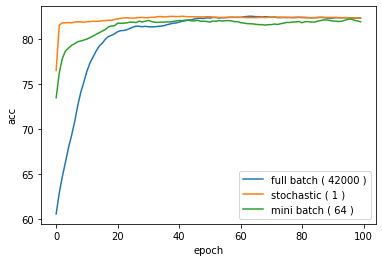

In [54]:
#Different batch sizes

weights1 = np.random.normal(loc=0.0, scale=1.0,size=12)
weights2 = weights1
weights3 = weights1
b1 = np.random.normal(loc=0.0, scale=1.0)
b2 = b1
b3 = b1

maxAcc = 0.5
correct = 0
false = 0

TP1 = 0
TN1 = 0
FN1 = 0
FP1 = 0


TP2 = 0
TN2 = 0
FN2 = 0
FP2 = 0


TP3 = 0
TN3 = 0
FN3 = 0
FP3 = 0

print("Batch Sıze 42000")
weights1, b1,epoch1,acc1 = gradient_descent(weights1,0.0001,100,b1)


for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights1,b1) == 1 ):
      TP1 = TP1 + 1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 2 ):
      TN1 = TN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 3 ):
      FN1 = FN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 4 ):
      FP1 = FP1 +1

"""
weights2 = np.random.normal(loc=0.0, scale=1.0,size=12)
b2 = np.random.normal(loc=0.0, scale=1.0)
"""

print("Batch Sıze 1")
weights2, b2,epoch2,acc2 = stochastic_gradient_descent(weights2,0.0001,100,b2)


for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights2,b2) == 1 ):
      TP2 = TP2 + 1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 2 ):
      TN2 = TN2 +1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 3 ):
      FN2 = FN2 +1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 4 ):
      FP2 = FP2 +1

"""
weights3 = np.random.normal(loc=0.0, scale=1.0,size=12)
b3 = np.random.normal(loc=0.0, scale=1.0)
"""

batch = 64

print("Batch Sıze 64")
weights3, b3,epoch3,acc3 = mini_batch_gradient_descent(weights3,0.0001,100,b3,batch)
for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights3,b3) == 1 ):
      TP3 = TP3 + 1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 2 ):
      TN3 = TN3 +1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 3 ):
      FN3 = FN3 +1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 4 ):
      FP3 = FP3 +1


print( "Accuracy of batch size 42000:", (TP1 + TN1 ) /(FN1+ FP1 + TP1 + TN1))
print( "Accuracy of batch size 1:", (TP2 + TN2 ) /(FN2+ FP2 + TP2 + TN2))
print( "Accuracy of batch size 64:", (TP3 + TN3) /(FN3+ FP3 + TP2 + TN2))

ac1 = (TP1 + TN1 ) /(FN1+ FP1 + TP1 + TN1)

ac2 = (TP2 + TN2 ) /(FN2+ FP2 + TP2 + TN2)

ac3 = (TP3 + TN3) /(FN3+ FP3 + TP3 + TN3)

print( "Confusion matrix of best model")
if  acc1 >= acc2 and acc1 >= acc3:
  print( "(Full Batch)")
  print( "TP:",TP1,"FP",FP1)
  print( "FN:",FN1,"TN",TN1)   
elif acc2 >= acc1 and acc2 >= acc3:
  print( "(Stochastic)")
  print( "TP:",TP2,"FP",FP2)
  print( "FN:",FN2,"TN",TN2) 
else:
  print( "(Mini batch Gradient))")
  print( "TP:",TP3,"FP",FP3)
  print( "FN:",FN3,"TN",TN3)      

plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(epoch1,acc1,label="full batch ( 42000 )")

plt.plot(epoch2,acc2, label = "stochastic ( 1 )")

plt.plot(epoch3,acc3, label = "mini batch ( 64 )")

plt.legend()

plt.show()



In [56]:
print( "Confusion matrix of best model")
if  acc1 >= acc2 and acc1 >= acc3:
  print( "(Full Batch)")
  print( "TP:",TP1,"FP",FP1)
  print( "FN:",FN1,"TN",TN1)   
elif acc2 >= acc1 and acc2 >= acc3:
  print( "(Stochastic)")
  print( "TP:",TP2,"FP",FP2)
  print( "FN:",FN2,"TN",TN2) 
else:
  print( "(Mini batch Gradient))")
  print( "TP:",TP3,"FP",FP3)
  print( "FN:",FN3,"TN",TN3)    

Confusion matrix of best model
(Full Batch)
TP: 1494 FP 660
FN: 397 TN 3449


epoch: 0 4322 6000 72.03333333333333
epoch: 10 4780 6000 79.66666666666667
epoch: 20 4682 6000 78.03333333333333
epoch: 30 4324 6000 72.06666666666666
epoch: 40 4449 6000 74.15
epoch: 50 4625 6000 77.08333333333333
epoch: 60 4699 6000 78.31666666666666
epoch: 70 4708 6000 78.46666666666667
epoch: 80 4790 6000 79.83333333333333
epoch: 90 4875 6000 81.25
-----------------------------
epoch: 0 3897 6000 64.95
epoch: 10 4487 6000 74.78333333333333
epoch: 20 4554 6000 75.9
epoch: 30 4227 6000 70.45
epoch: 40 4428 6000 73.8
epoch: 50 4660 6000 77.66666666666667
epoch: 60 4729 6000 78.81666666666666
epoch: 70 4775 6000 79.58333333333333
epoch: 80 4854 6000 80.9
epoch: 90 4875 6000 81.25
-----------------------------
epoch: 0 3946 6000 65.76666666666667
epoch: 10 4670 6000 77.83333333333333
epoch: 20 4615 6000 76.91666666666667
epoch: 30 4330 6000 72.16666666666667
epoch: 40 4495 6000 74.91666666666667
epoch: 50 4664 6000 77.73333333333333
epoch: 60 4714 6000 78.56666666666666
epoch: 70 4763 6

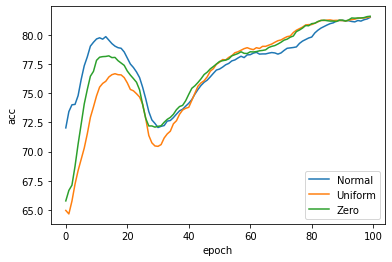

'\n  if i == 0:\n    print("accuracy on validation set with random distribution:",accuracy)\n  if i == 1:\n    print("accuracy on validation set with uniform distribution",accuracy)\n  if i == 2:\n    print("accuracy on validation set with zeros:",accuracy)\n  if( accuracy > maxAcc):\n    maxAcc = accuracy\n    maxI = i\n  \nif i == 0:\n  print("accuracy", maxAcc ,"on validation set with random distribution is highest")\nif i == 1:\n  print("accuracy", maxAcc ,"on validation set with uniform distribution is highest")\nif i == 2:\n  print("accuracy", maxAcc ,"on validation set with zeros is highest")\n'

In [58]:
# Finding best initialization

weights1 = np.random.normal(loc=0.0, scale=1.0,size=12)
b1 = np.random.normal(loc=0.0, scale=1.0)

weights2 = np.random.uniform(-1,1,12)
b2 = np.random.uniform(-1,1)

weights3 = np.zeros(12)
b3 = 0


weightArr = (weights1,weights2,weights3)
bArr = ( b1, b2, b3)

TP1 = 0
TN1 = 0
FN1 = 0
FP1 = 0

TP2 = 0
TN2 = 0
FN2 = 0
FP2 = 0


TP3 = 0
TN3 = 0
FN3 = 0
FP3 = 0

weights1, b1,epoch1,acc1 = mini_batch_gradient_descent(weights1,0.00001,100,b1,iter)

print("-----------------------------")
for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights1,b1) == 1 ):
      TP1 = TP1 + 1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 2 ):
      TN1 = TN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 3 ):
      FN1 = FN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights1,b1) == 4 ):
      FP1 = FP1 +1

weights2, b2,epoch2,acc2 = mini_batch_gradient_descent(weights2,0.00001,100,b2,iter)
for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights2,b2) == 1 ):
      TP2 = TP2 + 1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 2 ):
      TN2 = TN2 +1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 3 ):
      FN2 = FN2 +1
    elif (  calculateLogRes(validationArr[j,:],weights2,b2) == 4 ):
      FP2 = FP2 +1
print("-----------------------------")
weights3, b3,epoch3,acc3= mini_batch_gradient_descent(weights3,0.00001,100,b3,iter)
for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights3,b3) == 1 ):
      TP3 = TP3 + 1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 2 ):
      TN3 = TN3 +1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 3 ):
      FN3 = FN3 +1
    elif (  calculateLogRes(validationArr[j,:],weights3,b3) == 4 ):
      FP3 = FP3 +1
print("-----------------------------")

print( "Accuracy of batch size 42000:", (TP1 + TN1 ) /(FN1+ FP1 + TP1 + TN1))
print( "Accuracy of batch size 1:", (TP2 + TN2 ) /(FN2+ FP2 + TP2 + TN2))
print( "Accuracy of batch size 64:", (TP3 + TN3) /(FN3+ FP3 + TP2 + TN2))

ac1 = (TP1 + TN1 ) /(FN1+ FP1 + TP1 + TN1)

ac2 = (TP2 + TN2 ) /(FN2+ FP2 + TP2 + TN2)

ac3 = (TP3 + TN3) /(FN3+ FP3 + TP3 + TN3)

print( "Confusion matrix of best model")
if  ac1 >= ac2 and ac1 >= acc3:
  print( "Normal")
  print( "TP:",TP1,"FP",FP1)
  print( "FN:",FN1,"TN",TN1)   
elif ac2 >= ac1 and ac2 >= ac3:
  print( "Uniform)")
  print( "TP:",TP2,"FP",FP2)
  print( "FN:",FN2,"TN",TN2) 
else:
  print( "(Zero)")
  print( "TP:",TP3,"FP",FP3)
  print( "FN:",FN3,"TN",TN3)      

plt.xlabel("epoch")
plt.ylabel("acc")

plt.plot(epoch1,acc1,label="Normal")

plt.plot(epoch2,acc2, label = "Uniform")

plt.plot(epoch3,acc3, label = "Zero")

plt.legend()

plt.show()

"""
  if i == 0:
    print("accuracy on validation set with random distribution:",accuracy)
  if i == 1:
    print("accuracy on validation set with uniform distribution",accuracy)
  if i == 2:
    print("accuracy on validation set with zeros:",accuracy)
  if( accuracy > maxAcc):
    maxAcc = accuracy
    maxI = i
  
if i == 0:
  print("accuracy", maxAcc ,"on validation set with random distribution is highest")
if i == 1:
  print("accuracy", maxAcc ,"on validation set with uniform distribution is highest")
if i == 2:
  print("accuracy", maxAcc ,"on validation set with zeros is highest")
"""


<ipython-input-7-9fda2c303876>:19: RuntimeWarning: overflow encountered in exp
  res = res + trainingArr[j][i]* ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
<ipython-input-7-9fda2c303876>:13: RuntimeWarning: overflow encountered in exp
  res = res + ( trainingArr[j][12] - 1  +  1/ (1 + np.exp(  cons + arr[1]*trainingArr[j][1] + arr[2]*trainingArr[j][2] + arr[3]*trainingArr[j][3] + arr[4]*trainingArr[j][4]
<ipython-input-11-4b81b56065a8>:2: RuntimeWarning: overflow encountered in exp
  if np.exp( cons + weigts[0]*arr[0] + weigts[1]*arr[1] + weigts[2]*arr[2] + weigts[3]*arr[3] + weigts[4]*arr[4]
<ipython-input-11-4b81b56065a8>:7: RuntimeWarning: overflow encountered in exp
  elif np.exp( cons + weigts[0]*arr[0] + weigts[1]*arr[1] + weigts[2]*arr[2] + weigts[3]*arr[3] + weigts[4]*arr[4]


epoch: 0 3353 6000 55.88333333333333
epoch: 10 4732 6000 78.86666666666666
epoch: 20 4839 6000 80.65
epoch: 30 4843 6000 80.71666666666667
epoch: 40 3049 6000 50.81666666666667
epoch: 50 4628 6000 77.13333333333334
epoch: 60 4902 6000 81.7
epoch: 70 3911 6000 65.18333333333334
epoch: 80 3730 6000 62.166666666666664
epoch: 90 4912 6000 81.86666666666666
epoch: 0 3578 6000 59.63333333333333
epoch: 10 3624 6000 60.4
epoch: 20 3663 6000 61.05
epoch: 30 3705 6000 61.75
epoch: 40 3734 6000 62.233333333333334
epoch: 50 3767 6000 62.78333333333333
epoch: 60 3780 6000 63.0
epoch: 70 3807 6000 63.45
epoch: 80 3817 6000 63.61666666666667
epoch: 90 3826 6000 63.766666666666666
epoch: 0 3808 6000 63.46666666666667
epoch: 10 3810 6000 63.5
epoch: 20 3814 6000 63.56666666666667
epoch: 30 3815 6000 63.583333333333336
epoch: 40 3817 6000 63.61666666666667
epoch: 50 3818 6000 63.63333333333333
epoch: 60 3821 6000 63.68333333333333
epoch: 70 3823 6000 63.71666666666667
epoch: 80 3825 6000 63.75
epoch: 90

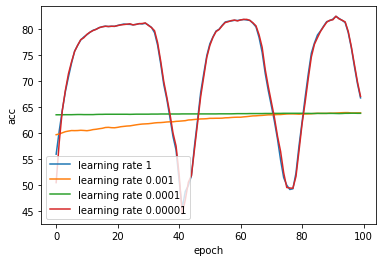

----------
TP: 640 FP 1514
FN: 466 TN 3380


In [14]:

#Finding optimal learning rate

plt.xlabel("epoch")
plt.ylabel("acc")


lRate = ( 0,-3,-4,5)
weights1 = np.random.normal(loc=0.0, scale=1.0,size=12)
b1 = np.random.normal(loc=0.0, scale=1.0)
maxAcc = 0.5
optimalLearn = -5
for iter in lRate:
  correct = 0
  false = 0
  weightsC = weights1
  bC = b1
  weightsC, bC,epoch,acc = gradient_descent(weightsC,pow(10,iter),100,bC)

  if iter == 0:
    plt.plot(epoch,acc,label = "learning rate 1" )
  elif iter == -3:
    plt.plot(epoch,acc,label = "learning rate 0.001" )
  elif iter == -4:
    plt.plot(epoch,acc,label = "learning rate 0.0001" )
  else:
    plt.plot(epoch,acc,label = "learning rate 0.00001" )

  for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weightsC,bC) <= 2 ):
      correct = correct + 1
    else:
      false = false +1
  accuracy = correct*100 / (correct + false)
  #print("accuracy on validation set",iter,":",accuracy, "  maxAcc =",maxAcc)
  if( accuracy > maxAcc):
    maxAcc = accuracy
    weights = weightsC
    b = bC
    optimalLearn = iter
  
print( "optimal Learn rate is 10 to the power ", optimalLearn)

plt.legend()

plt.show()

TP1 = 0
TN1 = 0
FN1 = 0
FP1 = 0

for j in range(0,validationSize):
    if  (  calculateLogRes(validationArr[j,:],weights,b) == 1 ):
      TP1 = TP1 + 1
    elif (  calculateLogRes(validationArr[j,:],weights,b) == 2 ):
      TN1 = TN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights,b) == 3 ):
      FN1 = FN1 +1
    elif (  calculateLogRes(validationArr[j,:],weights,b) == 4 ):
      FP1 = FP1 +1

print( "----------")
print( "TP:",TP1,"FP",FP1)
print( "FN:",FN1,"TN",TN1)   


In [16]:
# Most optimal part updated from prior parts

weightsOpt = np.zeros(12)
bOpt = 0
learningRate = 0.00001

weightsOpt, bOpt,epoch,acc = gradient_descent(weightsOpt,learningRate,100,bOpt)

TP = 0
TN = 0
FP = 0
FN = 0


for j in range(0,testSize):
  if  (  calculateLogRes(testArr[j,:],weightsOpt,bOpt) == 1 ):
    TP = TP + 1
  elif (  calculateLogRes(testArr[j,:],weightsOpt,bOpt) == 2 ):
    TN = TN +1
  elif (  calculateLogRes(testArr[j,:],weightsOpt,bOpt) == 3 ):
    FN = FN +1
  elif (  calculateLogRes(testArr[j,:],weightsOpt,bOpt) == 4 ):
    FP = FP +1


print( "TP:",TP,"FP",FP)
print( "FN:",FN,"TN",TN)     

print("Acc:", 100*(TP+TN) / (TP+TN +FN + FP))

epoch: 0 3846 6000 64.1
epoch: 10 3846 6000 64.1
epoch: 20 3846 6000 64.1
epoch: 30 3848 6000 64.13333333333334
epoch: 40 3876 6000 64.6
epoch: 50 3937 6000 65.61666666666666
epoch: 60 4026 6000 67.1
epoch: 70 4126 6000 68.76666666666667
epoch: 80 4226 6000 70.43333333333334
epoch: 90 4295 6000 71.58333333333333
TP: 1077 FP 3272
FN: 38 TN 7613
Acc: 72.41666666666667


In [17]:
print("Precision",TP/ (TP +FP) )
prec = TP/ (TP +FP)
print("Recall",TP/(TP+FN))
recall = TP/(TP+FN)
print("Accuracy",(TP+TN) / (TP+TN +FN + FP))
print("F2",5*prec*recall / (4*prec+recall))
print("F1",2*prec*recall / (2*prec+recall))
print("F0.5",5*prec*recall /  (prec+4*recall))
print("False positive rate",FP / (FP +TN) )

Precision 0.24764313635318463
Recall 0.9659192825112107
Accuracy 0.7241666666666666
F2 0.6113066182313542
F1 0.3274053807569539
F0.5 0.290908108692129
False positive rate 0.30059715204409737
